<a href="https://colab.research.google.com/github/calvinpan1/ds3001_assignments/blob/main/01_assignment_wrangling_and_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [99]:
# Get data
! git clone https://github.com/ds4e/get_data
%run ./get_data/get_data.py

# Import libraries
import pandas as pd
import seaborn as sns

fatal: destination path 'get_data' already exists and is not an empty directory.


<Figure size 640x480 with 0 Axes>

In [100]:
# Q1.1
# Describe airbnb & price
airbnb = pd.read_csv('data/airbnb_NYC.csv', encoding = 'latin1')
airbnb.tail(2)

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
30476,43000991,8/31/2015,Charming private female room: UWS,Manhattan,Apartment,NaN,Private room,10025.0,1.0,1,0,35,NaN
30477,42999189,8/31/2015,Huge Beautiful Bedroom - Astoria,Queens,House,NaN,Private room,11105.0,1.0,1,0,80,NaN


In [101]:
airbnb.dtypes
# Price is type object, thus cast it to numeric
# First begin by replacing commas with nothing
airbnb['Price'].str.replace(',','')
# Then coerce to numeric
airbnb['Price'] = pd.to_numeric(airbnb['Price'], errors='coerce')

<Axes: xlabel='Price', ylabel='Count'>

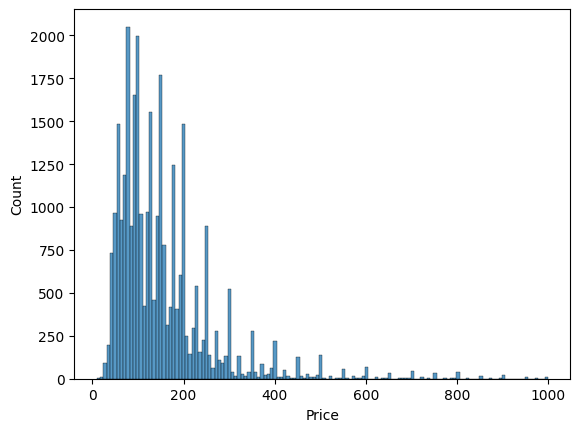

In [102]:
# Histogram of Price
sns.histplot(airbnb['Price'])

In [103]:
# Number of missing values:
print(airbnb['Price'].isna().sum())

181


In [104]:
# Q1.2______ Categorical variable: For the Minnesota police use of for data,
# mn_police_use_of_force.csv, clean the subject_injury variable, handling
# the NA's; this gives a value Yes when a person was injured by police, and
# No when no injury occurred.
mn_police = pd.read_csv('data/mn_police_use_of_force.csv')
mn_police['isna'] = mn_police['subject_injury'].isna()

# What proportion of the values are missing?
print(str(mn_police['subject_injury'].isna().mean()*100) + "% of values are missing")

# For the remaining missing values, replace the np.nan/None values with the label Missing.
mn_police.fillna({'subject_injury':'Missing'},inplace=True)

# Cross-tabulate your cleaned subject_injury variable with the force_type variable.
pd.crosstab(mn_police['subject_injury'], mn_police['force_type'])

# Are there any patterns regarding when the data are missing?
# It seems like less lethal methods are missing more data: ~70% missing for bodily force,
# ~90% for chemical irritants, 100% for less lethal and maximal restraint technique, and
# ~85% for taser. In contrast, only ~30% are missing for gun point display, and 0%
# for firearm (small sample size of only 2 observations though)

76.19342359767892% of values are missing


force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury,,,,,,,,,,,
Missing,2,7051,1421,0,27,74,87,0,170,31,985
No,0,1093,131,2,33,34,0,1,0,2,150
Yes,2,1286,41,0,44,40,0,2,0,44,172


In [105]:
# ____Q1.3 For metabric.csv, convert the Overall Survival Status variable into a
# dummy/binary variable, taking the value 0 if the patient is deceased and 1 if
# they are living.
metabric = pd.read_csv("data/metabric.csv", encoding = 'latin1')
metabric['Overall Survival Status'] = metabric['Overall Survival Status'].map({'0:LIVING':0, '1:DECEASED':1})
metabric.head(2)

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.02,84.633333,0,YES,2.615035,10.0,1.0
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.03,163.700000,1,NO,2.615035,15.0,2.0


In [106]:
# Q1.4 ________ Missing values: For airbnb_NYC.csv, determine how many missing values
# of Review Scores Rating there are.
print("There are " + str(airbnb['Review Scores Rating'].isna().sum()) + " missing values")

# Create a new variable, in which you impute the median score for non-missing
# observations to the missing ones.
airbnb.fillna({'Review Scores Rating': airbnb['Review Scores Rating'].median()}, inplace=True)
airbnb.head(10)

# Why might this bias or otherwise negatively impact your results?
# This will likely bias any measure of central tendency towards the median of 94
# and also decrease any measure of variance due to the large spike of values
# at 94 exactly. This will make the distribution look much more clustered around 94
# than it actually is.

There are 8323 missing values


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145.0,94.0
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37.0,94.0
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28.0,94.0
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199.0,94.0
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549.0,96.0
5,1039,7/25/2008,Big Greenpoint 1BD w/ Skyline View,Brooklyn,Apartment,100.0,Entire home/apt,11222.0,1.0,1,4,149.0,100.0
6,1783,8/12/2008,Amazing Also,Manhattan,Apartment,100.0,Entire home/apt,10004.0,1.0,1,9,250.0,100.0
7,2078,8/15/2008,"Colorful, quiet, & near the subway!",Brooklyn,Apartment,90.0,Private room,11201.0,1.0,1,80,90.0,94.0
8,2339,8/20/2008,East Village Cocoon: 2 Bedroom Flat,Manhattan,Apartment,90.0,Entire home/apt,10009.0,2.0,1,95,270.0,90.0
9,2339,8/20/2008,Lovely 2 Bedroom East Village Nest,Manhattan,Apartment,95.0,Entire home/apt,10009.0,2.0,1,23,290.0,96.0


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [107]:
# Q2.1______Setup: Load code directly from .xls file so this actually runs whenever whoever's
# grading this runs it. If I just downloaded the shark attack xls file and
# put it on my temp repository in Colab, or downloaded it onto my system and called
# it from there, this code wouldn't run for whoever is grading this because they
# have different files and paths.

import requests

# Direct file URL
url = "https://sharkattackfile.net/spreadsheets/GSAF5.xls"

# Temporary file path (Colab runtime temp directory)
temp_path = "/tmp/GSAF5.xls"

# Download the file
response = requests.get(url)
response.raise_for_status()

with open(temp_path, "wb") as f:
    f.write(response.content)

# Load into pandas df
shark_attacks = pd.read_excel(temp_path)

# Preview
shark_attacks.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source
5538,1940,1940,Invalid,SOUTH AFRICA,KwaZulu-Natal,Winkelspruit,NaN,Indian female,F,NaN,FATAL,NaN,NaN,Questionable incident,"V.M. Coppleson (1958), p.247; SAF Case #161. U..."
5539,1940,1940,Invalid,SOUTH AFRICA,Eastern Cape Province,"Kowie River Mouth, Port Alfred",Standing in water with child in her arms,female,F,NaN,Leg bitten,NaN,NaN,Questionable incident,"E. Skaife, V. M. Coppleson (1958), p.247; M. ..."


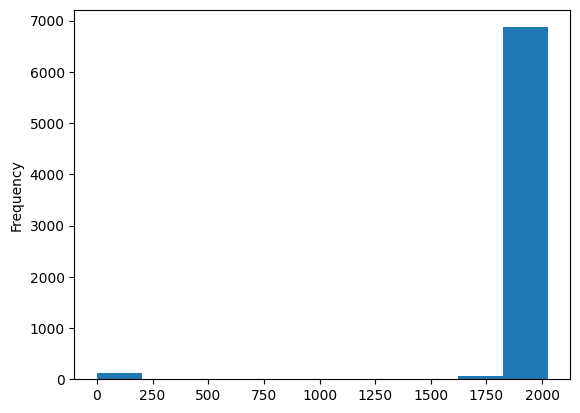

In [108]:
# Q2.2____ Drop any columns that do not contain data.
shark_attacks.drop(['pdf','href formula', 'href', 'Case Number', 'Case Number.1',
                    'original order','Unnamed: 21', 'Unnamed: 22'], axis=1, inplace = True)
shark_attacks.head()
# Q2.3____ What is an observation? Carefully justify your answer
# and explain how it affects your choices in cleaning and analyzing the data.
# An observation is one victim of an attack. It is not an attack itself:
# each row has "Name", "Sex", and "Age", which are personal identifiers, and theoretically,
# one shark attack can have multiple victims. Being aware of the possibility that
# there can be multiple victims per attack will stop me from trying to delete
# entries that may look like duplicates because they belong to one attack.

# Q2.4_____ Clean the year variable. Describe the range of values you see.
shark_attacks['Year'] = shark_attacks['Year'].astype('Int64')
shark_attacks['Year'].describe()
shark_attacks['Year'].plot.hist()
# There are a weird number of values with year 0 -- perhaps those should be dropped.
# Not dropping those currently, but good to consider

# Filter the rows to focus on attacks since 1940. Are attacks increasing,
# decreasing, or remaining constant over time?
shark_attacks_post1940 = shark_attacks[shark_attacks['Year'] >= 1940].copy()
shark_attacks_post1940.tail(2)


<Axes: ylabel='Frequency'>

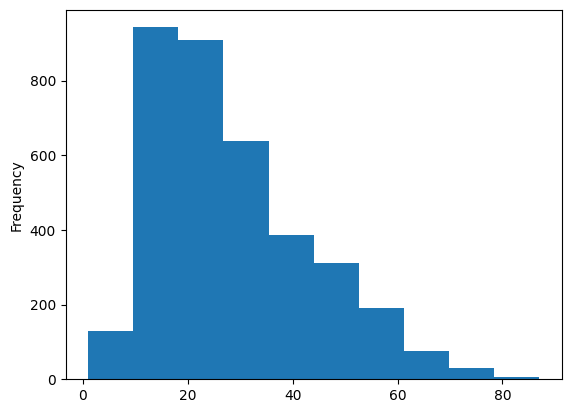

In [109]:
# Q2.5_____ Clean the Age variable and make a histogram of the ages of the victims.
shark_attacks_post1940['Age'] = pd.to_numeric(
    shark_attacks_post1940['Age'],
    errors='coerce'
)
shark_attacks_post1940['Age'].plot.hist()

In [110]:
# Q2.6_____ Clean the Type variable so it only takes three values:
# Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
shark_attacks_post1940['Type'] = shark_attacks_post1940['Type'].map({
    'Provoked': 'Provoked',
    'Unprovoked': 'Unprovoked',
    'Invalid': 'Unknown',
    'Watercraft': 'Unknown',
    'Unconfirmed': 'Unknown',
    'Sea Disaster':'Unknown',
    'Questionable': 'Unknown',
    'Boat': 'Unknown',
    'unprovoked': 'Unprovoked',
    '?': 'Unknown',
    'Unverified': 'Unknown',
    'Under Investigation': 'Unknown',
})
shark_attacks_post1940['Type'].value_counts()

,count
Type,
Unprovoked,4126
Unknown,874
Provoked,521


In [111]:
# Q2.7_____ Clean the Fatal Y/N variable so it only takes three values: Y, N, and Unknown.
shark_attacks_post1940['Fatal Y/N'] = shark_attacks_post1940['Fatal Y/N'].map({
    'N': 'N',
    'Y': 'Y',
    'UNKNOWN': 'Unknown',
    'N': 'N',
    'F': 'Y', #interpreting as F for fatal and thus Y, but could be F for false
    'M': 'Unknown',
    'Nq': 'Unknown',
    'n': 'N',
    '2017':'Unknown',
    'Yx2':'Unknown'
 })
shark_attacks_post1940['Fatal Y/N'].value_counts()

,count
Fatal Y/N,
N,4239
Y,835
Unknown,49


In [112]:
# Q2.8_____ Is the attack more or less likely to be fatal when the attack is provoked
# or unprovoked? Thoughts?
pd.crosstab(shark_attacks_post1940['Fatal Y/N'], shark_attacks_post1940['Type'])
# Response: The attack is much more likely to be fatal when the attack is unprovoked
# compared to provoked: unprovoked fatality rate is 12/510 (obs we have data for) which is
# around 2%, provoked is 697/4071 which is around 17.5%. This makes me think that
# people who provoke shark attacks are usually much more likely to be prepared
# to fight back or at least survive.

Type,Provoked,Unknown,Unprovoked
Fatal Y/N,,,
N,498,356,3374
Unknown,4,6,38
Y,12,125,697


**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

In [113]:
# Question 3.1_____ (doing this in a code chunk for sake of legibility and consistency):
# This paper is about creating a standard for tidy data, so that future data analysts
# can rely upon data being organized in a certain way and don't have to spend
# countless hours trying to organize it so that it can be analyzed.

In [114]:
# Question 3.2____
# This 'tidy data standard' is meant to give statisticians and others not most familiar
# with CS/relational databases and relational algebra a way to implement the innovations
# of the CS field in organizing data well.

In [115]:
# Question 3.3____
# The sentence "Like families, tidy datasets are all alike but every messy dataset is
# messy in its own way" means that tidy datasets are ones that follow the same
# organizational principles, while everything that doesn't follow this is a
# messy dataset.

# The sentence "For a given dataset, it’s usually easy to figure out
# what are observations and what are variables, but it is surprisingly difficult to
# precisely define variables and observations in general" means that it's often
# hard to figure out what variables mean -- e.g. "elasticity" is context
# dependent, and means very different things in physics (literally how bouncy something is)
# than in economics.

In [116]:
# Question 3.4___
# Wickham defines the following:
# Value: number or a string usually, belonging to both a var and obs.
# Variables: All values that measure the same underlying attributes (heat, etc) across units.
# Observations: Set of all values that measure the same unit (e.g same person)

In [117]:
# Question 3.5___
# In tidy data, 1) each var is a column, 2) each obs forms a row, and
# 3) each type of obs. unit forms a table.

In [118]:
# Question 3.6_____
# The 5 most common problems with messy dataset are:
# 1) Column headers are values, not var names
# 2) Multiple vars are stored in one column
# 3) Variables are stored in both vars and columns
# 4) Multiple types of observational units are stored in the same table
# 5) A single obs. unit is stored in multiple tables

# Table 4 is messy because the column headers are values: $10k-20k, etc.

# "Melting" a dataset is when you turn columns into rows.

In [119]:
# Question 3.7____
# Table 11 has columns that start with different days (d1, d2, d3, etc.), while Table 12
# has date as a column and thus each observation has a value in each column.

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
6. Which giftors provide the most money, in total?

In [120]:
# Q4.1_____ Load data
foreign_gifts = pd.read_csv('data/ForeignGifts_edu.csv')
foreign_gifts.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


,Foreign Gift Amount
count,2.822100e+04
mean,5.882327e+05
std,3.222011e+06
min,-5.377700e+05
25%,5.700000e+03
50%,9.461500e+04
75%,3.761420e+05
max,1.000000e+08


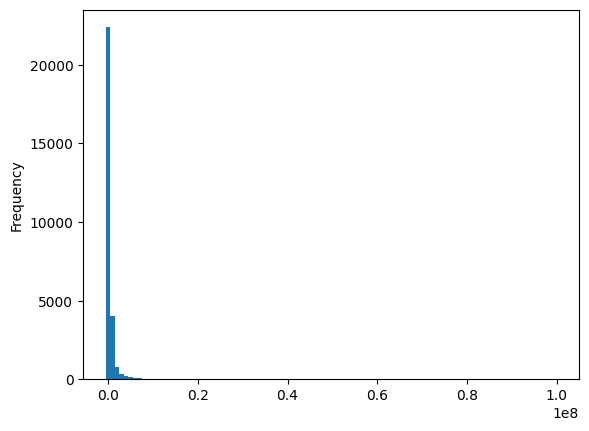

In [121]:
# Q4.2_____ For Foreign Gift Amount, create a histogram and describe the variable.
foreign_gifts['Foreign Gift Amount'].plot.hist(bins = 100)
foreign_gifts['Foreign Gift Amount'].describe()
# Describe your findings
# There are a couple very large gifts on this dataset in the order of tens millions that
# skew the histogram of this dataset, but the vast majority of gifts are below
# 10 million. The average gifts is around $94,615, and there are a couple observations
# that are negative in size.


In [122]:
# Q4.3____ For Gift Type, create a histogram or value counts table.
foreign_gifts['Gift Type'].value_counts()

,count
Gift Type,
Contract,17274
Monetary Gift,10936
Real Estate,11


In [123]:
# What proportion of the gifts are contracts, real estate, and monetary gifts?
foreign_gifts['Gift Type'].value_counts(normalize = True)

,proportion
Gift Type,
Contract,0.612097
Monetary Gift,0.387513
Real Estate,0.000390


In [124]:
# Q4.4____ What are the top 15 countries in terms of the number of gifts?
foreign_gifts['Country of Giftor'].value_counts().head(15)

,count
Country of Giftor,
ENGLAND,3655
CHINA,2461
CANADA,2344
JAPAN,1896
SWITZERLAND,1676
SAUDI ARABIA,1610
FRANCE,1437
GERMANY,1394
HONG KONG,1080


In [125]:
# What are the top 15 countries in terms of the amount given?
foreign_gifts.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)

,Foreign Gift Amount
Country of Giftor,
QATAR,2706240869
ENGLAND,1464906771
CHINA,1237952112
SAUDI ARABIA,1065205930
BERMUDA,899593972
CANADA,898160656
HONG KONG,887402529
JAPAN,655954776
SWITZERLAND,619899445


In [126]:
# Q4.5___ What are the top 15 institutions in terms of the total amount of money they receive?
foreign_gifts.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)

,Foreign Gift Amount
Institution Name,
Carnegie Mellon University,1477922504
Cornell University,1289937761
Harvard University,954803610
Massachusetts Institute of Technology,859071692
Yale University,613441311
Texas A&M University,521455050
Johns Hopkins University,502409595
Northwestern University,402316221
Georgetown University,379950511


<Axes: ylabel='Frequency'>

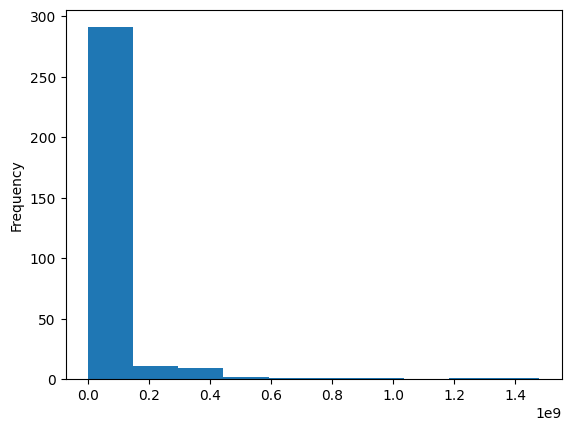

In [127]:
# Make a histogram of the total amount received by all institutions.
foreign_gifts.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).plot.hist()

In [128]:
# Which giftors provide the most money, in total?
foreign_gifts.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)

,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
HCL,190000000
Church of Jesus Christ of LDS,185203715
Emirates Institute for Advanced Sc,170641244
QIC,148355497


**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

In [130]:
# Q5.1____
college_comp = pd.read_csv('data/college_completion.csv')

# Q5.2____
# How many observations and variables are in the data?
college_comp.describe()
# There are 3798 obs and 51 vars in the data.

,index,unitid,long_x,lat_y,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,...,vsa_grad_elsewhere_after4_transfer,vsa_enroll_after4_transfer,vsa_enroll_elsewhere_after4_transfer,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,state_sector_ct,carnegie_ct,cohort_size
count,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3.798000e+03,3798.000000,...,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,3798.000000,3798.000000,3467.000000
mean,1898.500000,226063.790416,-91.030391,38.134044,4476.135334,23.435176,22.845656,22.484044,6.507447e+04,61282.189837,...,6.442222,12.233704,8.641852,57.960370,9.705926,3.001481,5.909630,34.284360,232.557662,658.306028
std,1096.532489,105065.777685,15.684064,5.040303,7376.868923,10.615140,6.322818,4.770449,1.074379e+05,33295.027077,...,3.606922,6.220198,3.919950,16.368681,4.641213,2.158996,2.988662,28.311303,156.960653,961.782580
min,0.000000,100654.000000,-159.395966,19.699720,23.000000,0.500000,3.200000,16.500000,0.000000e+00,12346.000000,...,-13.400000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,949.250000,155063.250000,-97.294767,34.299610,581.250000,17.300000,19.300000,21.500000,3.231125e+04,35830.000000,...,4.700000,8.325000,6.200000,51.050000,7.500000,1.525000,4.200000,14.000000,106.000000,131.000000
50%,1898.500000,198075.000000,-86.828840,38.988143,1794.500000,21.300000,22.200000,22.500000,5.057850e+04,54025.000000,...,6.400000,11.800000,8.300000,59.500000,9.700000,2.700000,5.700000,25.000000,169.000000,356.000000
75%,2847.750000,233745.000000,-79.966228,41.633128,5172.000000,26.500000,24.200000,24.600000,7.693025e+04,79310.000000,...,7.800000,15.075000,10.800000,68.075000,11.900000,3.900000,7.200000,48.000000,343.000000,782.500000
max,3797.000000,475291.000000,-67.243306,71.324702,170144.000000,137.600000,59.900000,32.800000,5.282095e+06,188870.000000,...,29.800000,64.500000,25.300000,89.300000,32.000000,17.200000,21.300000,116.000000,517.000000,16229.000000


In [131]:
# Use .head() to examine the first few rows of data.
college_comp.head(2)

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0


In [132]:
# Q5.3____
# Cross tabulate control and level. Describe the patterns you see in words.
pd.crosstab(college_comp['control'], college_comp['level'])

# Private not-for-profits are overwhelmingly 4-year institutions, private for-profits
# are split 50-50, and publics skew more to 2-year institutions.

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


<Axes: ylabel='Density'>

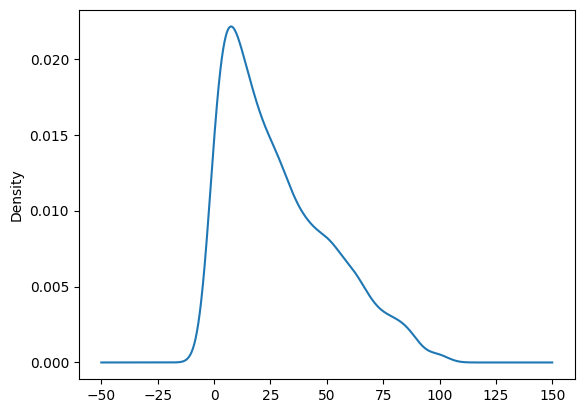

In [137]:
# Q5.4____ For grad_100_value, create a kernel density plot and describe table.
college_comp['grad_100_value'].plot.kde()
# Institutions' modal and mean graduation rate hovers around 0-25% (big spike there),
# and this tapers off pretty quickly from then onwards.

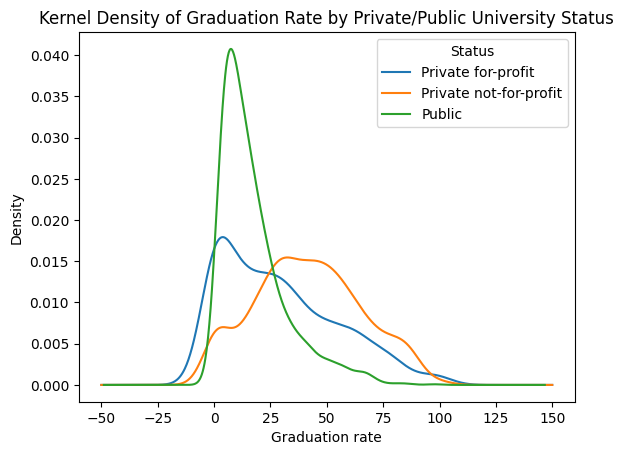

In [159]:
# Now condition on control, and produce a kernel density plot
import matplotlib.pyplot as plt

# Create a figure first
plt.figure()

for ctl, group in college_comp.groupby('control'):
    group['grad_100_value'].plot.kde(label=str(ctl))  # returns an Axes, but we ignore it here

plt.xlabel('Graduation rate')
plt.ylabel('Density')
plt.title('Kernel Density of Graduation Rate by Private/Public University Status')
plt.legend(title='Status')
plt.show()

In [146]:
# and describe tables for each type of institutional control.
college_comp.groupby('control')['grad_100_value'].describe()

# Which type of institution appear to have the most favorable graduation rates?
# Private not-for-profit institutions appear to have the most favorable graduation
# rates.

,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,779.0,29.108858,25.601687,0.0,6.95,24.7,46.75,100.0
Private not-for-profit,1189.0,41.660976,23.551231,0.0,25.00,41.0,58.30,100.0
Public,1499.0,17.430887,14.729443,0.0,6.90,13.2,23.25,97.8


,aid_value,grad_100_value
aid_value,1.000000,0.575879
grad_100_value,0.575879,1.000000


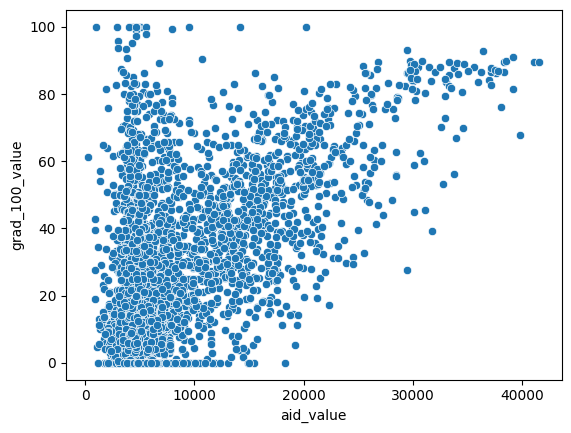

In [150]:
# Q5.5____ Make a scatterplot of grad_100_value by aid_value, and compute the
# covariance and correlation between the two variables.
import seaborn as sns
sns.scatterplot(x=college_comp['aid_value'], y=college_comp['grad_100_value'])
# Correlation
college_comp[['aid_value', 'grad_100_value']].corr()

In [154]:
# Covariance
college_comp[['aid_value', 'grad_100_value']].cov()

# Describe what you see.
# There is a moderately strong correlation between aid value and graduation rates (R = 0.575)

,aid_value,grad_100_value
aid_value,4.121201e+07,88610.483169
grad_100_value,8.861048e+04,543.483382


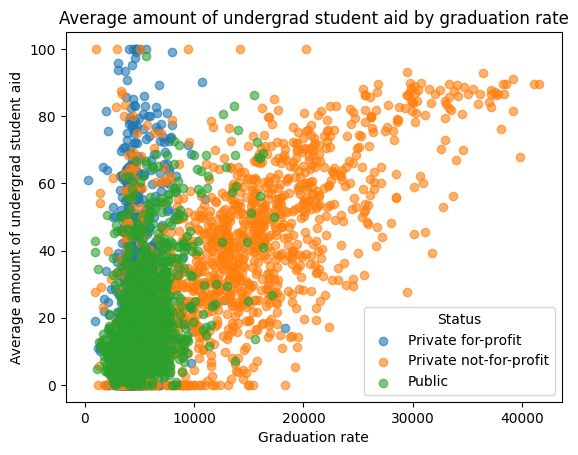

In [160]:
# Now make the same plot and statistics, but conditioning on control.
plt.figure()

for ctl, group in college_comp.groupby('control'):
    plt.scatter(group['aid_value'], group['grad_100_value'], label=str(ctl), alpha=0.6)

plt.xlabel('Graduation rate')
plt.ylabel('Average amount of undergrad student aid')
plt.title('Average amount of undergrad student aid by graduation rate')
plt.legend(title='Status')
plt.show()
# Describe what you see. For which kinds of institutions does aid seem to vary
# positively with graduation rates?

# Graduation rate seems to only have a strong correlation with average amount of
# undergraduate student aid for private non-profit universities.

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

In [ ]:
# Please see this file on github: https://github.com/calvinpan1/ds3001_assignments/blob/6ccfdc71a3c2a79dd41ec50f063f49ff7a5edf3b/DS%203001%20Assignment%202%20Q6.pdf

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?